<a href="https://colab.research.google.com/github/vini-queiroz/python_data_science/blob/main/Aula_06_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Limpeza de dados

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Arquivos_aula/data2.csv')

x = df['Calories'].mean()
y = df['Maxpulse'].mean()  # Exemplo...

print(f'Média das calorias: {x}')
print(f'Média do pulso máx: {y}')

df.fillna({'Calories': x}, inplace=True)

# Formatando as datas, e substituindo os valores NaN

df['Date'] = pd.to_datetime(df['Date'], format = 'mixed')  # Formata todas as datas que não estejam no padrão de data do pandas

df.dropna(subset= ['Date'], inplace= True)  # Retira do data frame as linhas que possuem NaN na coluna Date

df.loc[7,'Duration'] = 45  # Substituimos na linha 7 a celula de duração po 45 min.

# df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%d/%m/%Y')  # Altera o formato da data para Dia, Mes e Ano.

print('Linhas duplicadas: ', df.duplicated().sum(),'\n')  # Quantidade de linhas duplicadas

df.drop_duplicates(inplace= True) # Deleta as linhas duplicadas

print('\n***----------------Tabela tratada----------------***\n')

print(df.to_string())


Média das calorias: 304.68
Média do pulso máx: 128.5
Linhas duplicadas:  1 


***----------------Tabela tratada----------------***

    Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130    409.10
1         60 2020-12-02    117       145    479.00
2         60 2020-12-03    103       135    340.00
3         45 2020-12-04    109       175    282.40
4         45 2020-12-05    117       148    406.00
5         60 2020-12-06    102       127    300.00
6         60 2020-12-07    110       136    374.00
7         45 2020-12-08    104       134    253.30
8         30 2020-12-09    109       133    195.10
9         60 2020-12-10     98       124    269.00
10        60 2020-12-11    103       147    329.30
11        60 2020-12-12    100       120    250.70
13        60 2020-12-13    106       128    345.30
14        60 2020-12-14    104       132    379.30
15        60 2020-12-15     98       123    275.00
16        60 2020-12-16     98       120    215.20
1

In [ ]:
df1 = pd.read_csv('/content/Arquivos_aula/datacor.csv')

print(df1.corr())

          Duration     Pulse  Maxpulse  Calories
Duration  1.000000 -0.155408  0.009403  0.922717
Pulse    -0.155408  1.000000  0.786535  0.025121
Maxpulse  0.009403  0.786535  1.000000  0.203813
Calories  0.922717  0.025121  0.203813  1.000000


In [92]:
# Exportando os dados...

df2 = pd.read_csv('/content/Arquivos_aula/venda.csv', sep= ';')

# Limpando os dados...

df2.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'], axis=1, inplace=True)   # Excluindo as colunas vazias

print('Linhas duplicadas: ', df.duplicated().sum(),'\n')  # Quantidade de linhas duplicadas

# Feita a padronização da data...

df2['Data'] = pd.to_datetime(df2['Data'], dayfirst= True, errors = 'coerce')
df2['Ano'] = df2['Data'].dt.year


print(type(df2['Data']))

df2.head()

# print(df2.to_string())

Linhas duplicadas:  0 

<class 'pandas.core.series.Series'>


,VendasID,Vendedor,Cliente,Data,Produto,ValorUni,Quantidade,Ano
0,1,Armando Lago,Cosme Zambujal,2019-01-01,Capacete Gometws Endorphine 2.0,155,2,2019
1,2,Iberê Lacerda,Gertrudes Hidalgo,2020-01-01,Bicicleta Gometws Endorphine 7.3,2966,2,2020
2,3,Jéssica Castelão,Antão Corte-Real,2020-01-02,Bicicleta Altools Stroll Aro 26,9201,2,2020
3,4,Hélio Liberato,Alexandra Tabares,2019-01-02,Bicicleta Gometws Endorphine 7.3,2966,2,2019
4,5,Napoleão Méndez,Diogo Simón,2018-01-03,Capacete Gometws Endorphine 2.0,155,1,2018


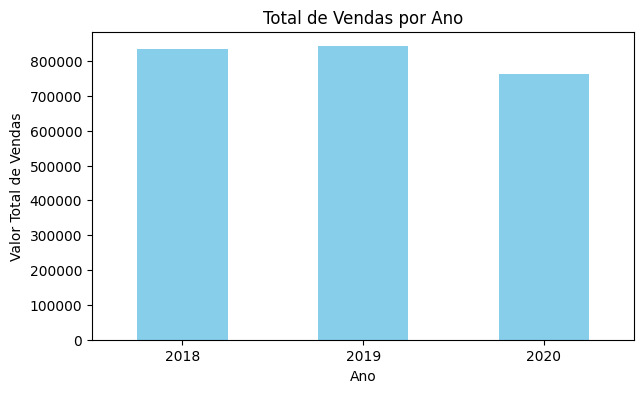

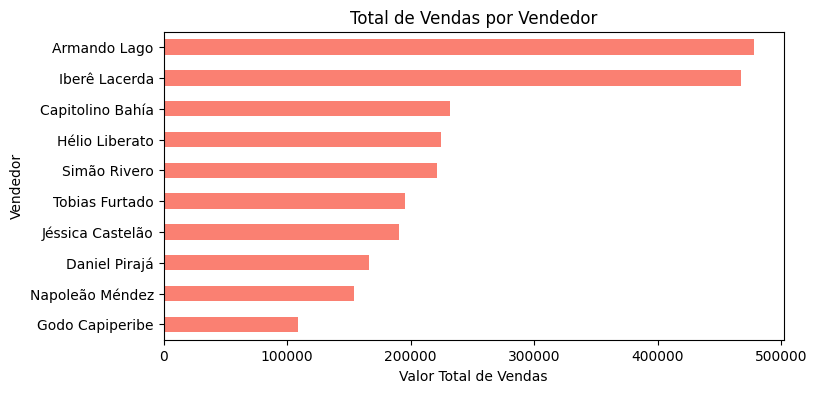

<Axes: ylabel='Valor_total'>

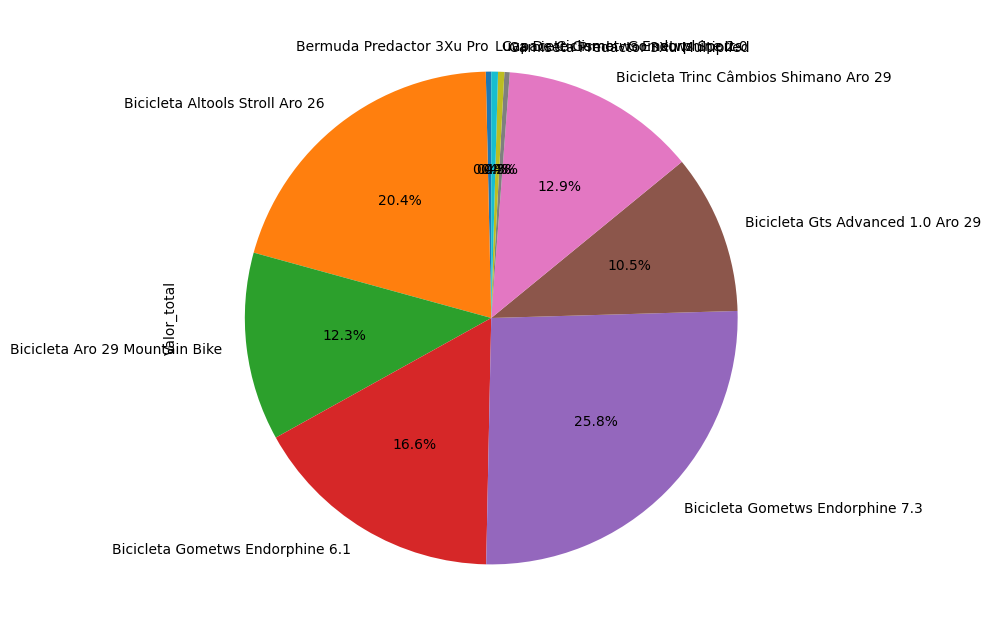

In [100]:
import matplotlib.pyplot as plt

df2['Valor_total'] = df2['ValorUni'] * df2['Quantidade']

vendas_por_vendedor = df2.groupby('Vendedor')['Valor_total'].sum().reset_index()



#df2.head()

# Gráfico de barras do valor total de vendas por ano

vendas_ano = df2.groupby('Ano')['Valor_total'].sum()

plt.figure(figsize=(7, 4))
vendas_ano.plot(kind='bar', color='skyblue')
plt.title('Total de Vendas por Ano')
plt.xlabel('Ano')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=0)
plt.show()

print('\n')

# Gráfico de barras do valor total por vendedor

vendas_vendedor = df2.groupby('Vendedor')['Valor_total'].sum()

plt.figure(figsize=(8, 4))
vendas_vendedor.sort_values(ascending=True).plot(kind='barh', color='salmon')
plt.title('Total de Vendas por Vendedor')
plt.xlabel('Valor Total de Vendas')
plt.ylabel('Vendedor')
plt.show()

# Gráfico de pizza quantidade de vendas por produto.

vendas_por_produto = df2.groupby('Produto')['Valor_total'].sum()

plt.figure(figsize=(8,8))
vendas_por_produto.plot(kind='pie', autopct='%1.1f%%', startangle=90)

